In [2]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('BDAS_Project').getOrCreate()

In [3]:
import pandas as pd

In [4]:
#FA = pd.read_csv('Datasets/Fatalities.csv')
#ME = pd.read_csv('Datasets/Metrics.csv')

In [5]:
#import data sets in Spark
FA = spark.read.csv('Datasets/Fatalities.csv',header=True,inferSchema=True)
ME = spark.read.csv('Datasets/Metrics.csv',header=True,inferSchema=True)

In [6]:
# check the datatypes of FA
FA.dtypes

[('Year', 'int'),
 ('ICD10 Code', 'string'),
 ('ICD10 Diagnosis', 'string'),
 ('Diagnosis Type', 'string'),
 ('Metric', 'string'),
 ('Sex', 'string'),
 ('Value', 'string')]

In [7]:
FA.show()

# Let's see how many rows of data we originally have.
print("Total data points:", FA.count())

+----+--------------------+--------------------+--------------------+--------------------+----+------+
|Year|          ICD10 Code|     ICD10 Diagnosis|      Diagnosis Type|              Metric| Sex| Value|
+----+--------------------+--------------------+--------------------+--------------------+----+------+
|2014|           All codes|          All deaths|          All deaths|Number of observe...|null|459087|
|2014|C33-C34 & C00-C14...|All deaths which ...|All deaths which ...|Number of observe...|null|235820|
|2014|             C00-D48|         All cancers|         All cancers|Number of observe...|null|136312|
|2014|             J00-J99|All respiratory d...|All respiratory d...|Number of observe...|null| 61744|
|2014|             I00-I99|All circulatory d...|All circulatory d...|Number of observe...|null|126101|
|2014|             K00-K93|All diseases of t...|All diseases of t...|Number of observe...|null| 22335|
|2014|             C33-C34|Trachea, Lung, Br...|Cancers which can...|Numb

In [8]:
# Import datasets in Pandas

FAP = pd.read_csv("Datasets/Fatalities.csv")
MEP = pd.read_csv("Datasets/Metrics.csv")

# Find null values to verify data quality using Pandas. 
# Count the Null Columns
# There are 583 null values in Sex column of Fatalities dataframe

null_columns=FAP.columns[FAP.isnull().any()]
FAP[null_columns].isnull().sum()

Sex    583
dtype: int64

In [9]:
#return every row that contains at least one null value in Fatalities
print(FAP[FAP.isnull().any(axis=1)][null_columns].head())

   Sex
0  NaN
1  NaN
2  NaN
3  NaN
4  NaN


In [10]:
# check data types of Metrics
ME.dtypes

[('Year', 'int'),
 ('Tobacco Price Index', 'int'),
 ('Retail Prices Index', 'int'),
 ('Tobacco Price Index Relative to Retail Price Index', 'int'),
 ('Real Households Disposable Income', 'int'),
 ('Affordability of Tobacco Index', 'int'),
 ('Household Expenditure on Tobacco', 'int'),
 ('Household Expenditure Total', 'int'),
 ('Expenditure on Tobacco as a Percentage of Expenditure', 'int')]

In [11]:
# Find null values to verify data quality using Pandas
# there are 5 null values in 3 column of Metrics dataset

#Count the Null Columns
null_columns=MEP.columns[MEP.isnull().any()]
MEP[null_columns].isnull().sum()

Household Expenditure on Tobacco                         5
Household Expenditure Total                              5
Expenditure on Tobacco as a Percentage of Expenditure    5
dtype: int64

In [12]:
#return every row that contains at least one null value in Metrics
print(MEP[MEP.isnull().any(axis=1)][null_columns].head())

    Household Expenditure on Tobacco  Household Expenditure Total  \
31                               NaN                          NaN   
32                               NaN                          NaN   
33                               NaN                          NaN   
34                               NaN                          NaN   
35                               NaN                          NaN   

    Expenditure on Tobacco as a Percentage of Expenditure  
31                                                NaN      
32                                                NaN      
33                                                NaN      
34                                                NaN      
35                                                NaN      


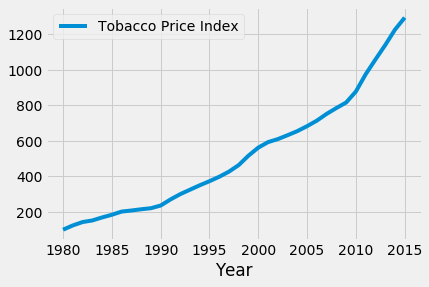

In [13]:
# Visualization through matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

#FAP = pd.read_csv("Datasets/Fatalities.csv")
#MEP = pd.read_csv("Datasets/Metrics.csv")

plt.style.use('fivethirtyeight')

MEP.plot(x='Year', y="Tobacco Price Index")

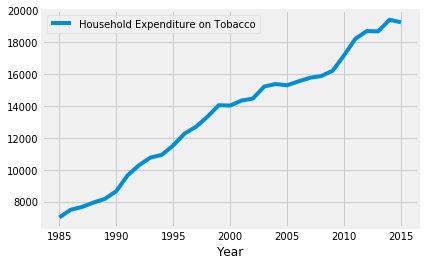

In [14]:
MEP.plot(x='Year', y="Household Expenditure on Tobacco")

In [15]:
FAP.dtypes

Year                int64
ICD10 Code         object
ICD10 Diagnosis    object
Diagnosis Type     object
Metric             object
Sex                object
Value              object
dtype: object

In [16]:
#Convert Value column to numeric from string
FAP.Value = pd.to_numeric(FAP.Value, errors = 'coerce').fillna(0).astype(np.int64)

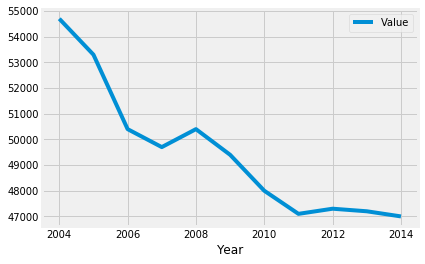

In [17]:
# Check the number of male deaths by each year
FAP2 = FAP[FAP['Metric'].str.contains("Attributable number") & FAP['Diagnosis Type'].str.match("All deaths") 
        & FAP['Sex'].str.match("Male")]
FAP2.plot(x='Year', y="Value")

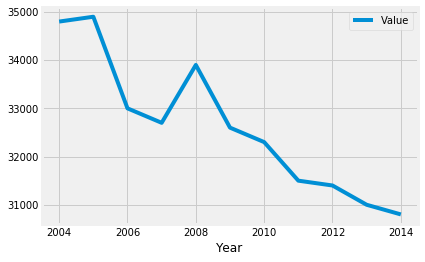

In [18]:
# Check the number of female deaths by each year
FAP2 = FAP[FAP['Metric'].str.contains("Attributable number") & FAP['Diagnosis Type'].str.match("All deaths") 
        & FAP['Sex'].str.match("Female")]
FAP2.plot(x='Year', y="Value")

Text(0,0.5,'')

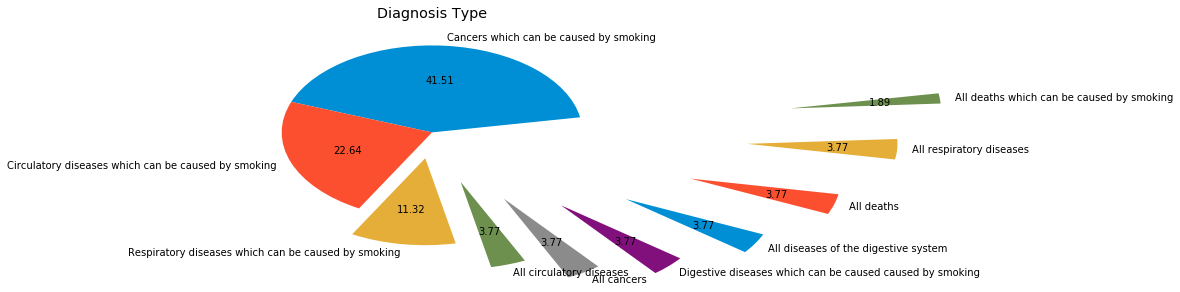

In [19]:
#Diagnosis Type
Diagnosis_Type = pd.DataFrame(FAP, columns = ['Diagnosis Type']) 
count_Diagnosis_Type = Diagnosis_Type.stack().value_counts()
ax = count_Diagnosis_Type.plot(kind = 'pie',
                              title = 'Diagnosis Type',
                              startangle = 10,
                              autopct='%.2f',
                              explode=(0,0,0.3,0.6,0.9,1.2,1.5,1.8,2.1,2.4))
ax.set_ylabel('')

In [20]:
# ICD10 Diagnosis
#ICD10_Diagnosis = pd.DataFrame(FAP, columns = ['ICD10 Diagnosis']) 
#count_ICD10_Diagnosis = ICD10_Diagnosis.stack().value_counts()
#ax = count_ICD10_Diagnosis.plot(kind = 'bar',
                             # title = 'ICD10 Diagnosis',
                             # fontsize=10,  width=0.5,  figsize=(12, 10))
#ax.set_ylabel('')

In [21]:
# Print schema allows us to visualise the data structure at a high level. 
FA.printSchema()

# We can also use head to print a specific amount of rows, so we can get a better understanding of the data points.
print(FA.head(1))

root
 |-- Year: integer (nullable = true)
 |-- ICD10 Code: string (nullable = true)
 |-- ICD10 Diagnosis: string (nullable = true)
 |-- Diagnosis Type: string (nullable = true)
 |-- Metric: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Value: string (nullable = true)

[Row(Year=2014, ICD10 Code='All codes', ICD10 Diagnosis='All deaths', Diagnosis Type='All deaths', Metric='Number of observed deaths', Sex=None, Value='459087')]


In [22]:
# We can use the describe method to get some general statistics on our data
FA.describe().show()

+-------+-----------------+----------+--------------------+--------------------+--------------------+------+------------------+
|summary|             Year|ICD10 Code|     ICD10 Diagnosis|      Diagnosis Type|              Metric|   Sex|             Value|
+-------+-----------------+----------+--------------------+--------------------+--------------------+------+------------------+
|  count|             1749|      1749|                1749|                1749|                1749|  1166|              1749|
|   mean|           2009.0|      null|                null|                null|                null|  null| 20231.65066512435|
| stddev|3.163182072502718|      null|                null|                null|                null|  null|53396.360340307976|
|    min|             2004| All codes|         All cancers|         All cancers| Attributable number|Female|                 .|
|    max|             2014|   K25-K27|Upper Respiratory...|Respiratory disea...|Number of observe...|  M

In [23]:
# Let's select the columns that are integers only for now
FA.select('Year').describe().show()

+-------+-----------------+
|summary|             Year|
+-------+-----------------+
|  count|             1749|
|   mean|           2009.0|
| stddev|3.163182072502718|
|    min|             2004|
|    max|             2014|
+-------+-----------------+



In [24]:
# Visualize using Pandas
pd.DataFrame(FA.take(10), columns=FA.columns)

,Year,ICD10 Code,ICD10 Diagnosis,Diagnosis Type,Metric,Sex,Value
0,2014,All codes,All deaths,All deaths,Number of observed deaths,None,459087
1,2014,C33-C34 & C00-C14 & C15 & C32 & C53 & C67 & C6...,All deaths which can be caused by smoking,All deaths which can be caused by smoking,Number of observed deaths,None,235820
2,2014,C00-D48,All cancers,All cancers,Number of observed deaths,None,136312
3,2014,J00-J99,All respiratory diseases,All respiratory diseases,Number of observed deaths,None,61744
4,2014,I00-I99,All circulatory diseases,All circulatory diseases,Number of observed deaths,None,126101
5,2014,K00-K93,All diseases of the digestive system,All diseases of the digestive system,Number of observed deaths,None,22335
6,2014,C33-C34,"Trachea, Lung, Bronchus",Cancers which can be caused by smoking,Number of observed deaths,None,28826
7,2014,C00-C14,Upper Respiratory Sites,Cancers which can be caused by smoking,Number of observed deaths,None,2197
8,2014,C32,Larynx,Cancers which can be caused by smoking,Number of observed deaths,None,653
9,2014,C15,Oesophagus,Cancers which can be caused by smoking,Number of observed deaths,None,6315


In [25]:
#import matplotlib.pyplot as plt
#plt.hist(FA)
#plt.xlabel("Year")
#plt.ylabel("Value")
#plt.show()

In [26]:
ME.show()

# Let's see how many rows of data we originally have.
print("Total data points:", ME.count())

+----+-------------------+-------------------+--------------------------------------------------+---------------------------------+------------------------------+--------------------------------+---------------------------+-----------------------------------------------------+
|Year|Tobacco Price Index|Retail Prices Index|Tobacco Price Index Relative to Retail Price Index|Real Households Disposable Income|Affordability of Tobacco Index|Household Expenditure on Tobacco|Household Expenditure Total|Expenditure on Tobacco as a Percentage of Expenditure|
+----+-------------------+-------------------+--------------------------------------------------+---------------------------------+------------------------------+--------------------------------+---------------------------+-----------------------------------------------------+
|2015|               1294|                387|                                               335|                              196|                            59|    

In [27]:
# check the datatypes of ME
ME.dtypes

[('Year', 'int'),
 ('Tobacco Price Index', 'int'),
 ('Retail Prices Index', 'int'),
 ('Tobacco Price Index Relative to Retail Price Index', 'int'),
 ('Real Households Disposable Income', 'int'),
 ('Affordability of Tobacco Index', 'int'),
 ('Household Expenditure on Tobacco', 'int'),
 ('Household Expenditure Total', 'int'),
 ('Expenditure on Tobacco as a Percentage of Expenditure', 'int')]

In [28]:
# Print schema allows us to visualise the data structure at a high level. 
ME.printSchema()

# We can also use head to print a specific amount of rows, so we can get a better understanding of the data points. 
print(ME.head(1))

root
 |-- Year: integer (nullable = true)
 |-- Tobacco Price Index: integer (nullable = true)
 |-- Retail Prices Index: integer (nullable = true)
 |-- Tobacco Price Index Relative to Retail Price Index: integer (nullable = true)
 |-- Real Households Disposable Income: integer (nullable = true)
 |-- Affordability of Tobacco Index: integer (nullable = true)
 |-- Household Expenditure on Tobacco: integer (nullable = true)
 |-- Household Expenditure Total: integer (nullable = true)
 |-- Expenditure on Tobacco as a Percentage of Expenditure: integer (nullable = true)

[Row(Year=2015, Tobacco Price Index=1294, Retail Prices Index=387, Tobacco Price Index Relative to Retail Price Index=335, Real Households Disposable Income=196, Affordability of Tobacco Index=59, Household Expenditure on Tobacco=19252, Household Expenditure Total=1152387, Expenditure on Tobacco as a Percentage of Expenditure=2)]


In [29]:
# We can use the describe method get some general statistics on our data too. 
ME.describe().show()

+-------+------------------+-------------------+-------------------+--------------------------------------------------+---------------------------------+------------------------------+--------------------------------+---------------------------+-----------------------------------------------------+
|summary|              Year|Tobacco Price Index|Retail Prices Index|Tobacco Price Index Relative to Retail Price Index|Real Households Disposable Income|Affordability of Tobacco Index|Household Expenditure on Tobacco|Household Expenditure Total|Expenditure on Tobacco as a Percentage of Expenditure|
+-------+------------------+-------------------+-------------------+--------------------------------------------------+---------------------------------+------------------------------+--------------------------------+---------------------------+-----------------------------------------------------+
|  count|                36|                 36|                 36|                                

In [30]:
# Let's select the columns that are integers, and use the describe method again.
# We see that the mean of Tobacco Price Index is 520.83, Retail Prices Index is 239.50, Tobacco Price Index Relative to Retail Price Index is 195.63,   
# Also the average Real Households Disposable Income is 154.66, Affordability of Tobacco Index is 81.97, Household Expenditure on Tobacco 13417.45, Household Expenditure Total is 652008.06 and average Expenditure on Tobacco as a Percentage of Expenditure is 2.387

ME.select('Tobacco Price Index', 'Retail Prices Index', 'Tobacco Price Index Relative to Retail Price Index','Real Households Disposable Income','Affordability of Tobacco Index','Household Expenditure on Tobacco','Household Expenditure Total','Expenditure on Tobacco as a Percentage of Expenditure').describe().show()

+-------+-------------------+-------------------+--------------------------------------------------+---------------------------------+------------------------------+--------------------------------+---------------------------+-----------------------------------------------------+
|summary|Tobacco Price Index|Retail Prices Index|Tobacco Price Index Relative to Retail Price Index|Real Households Disposable Income|Affordability of Tobacco Index|Household Expenditure on Tobacco|Household Expenditure Total|Expenditure on Tobacco as a Percentage of Expenditure|
+-------+-------------------+-------------------+--------------------------------------------------+---------------------------------+------------------------------+--------------------------------+---------------------------+-----------------------------------------------------+
|  count|                 36|                 36|                                                36|                               36|                       

In [31]:
# Using a for loop to find all columns that belong to the integer data type. 
numeric_features = [t[0] for t in ME.dtypes if t[1] == 'int']

# Selecting the numeric features, generating summary statistics, and converting to a Pandas DataFrame.
ME.select(numeric_features).describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Year,36,1997.5,10.535653752852738,1980,2015
Tobacco Price Index,36,520.8333333333334,336.4368333835386,100,1294
Retail Prices Index,36,239.5,83.14685802843059,100,387
Tobacco Price Index Relative to Retail Price Index,36,195.63888888888889,66.22263436006834,100,335
Real Households Disposable Income,36,154.66666666666666,35.84729517590652,99,196
Affordability of Tobacco Index,36,81.97222222222223,10.313614057188444,59,104
Household Expenditure on Tobacco,31,13417.451612903225,3796.825216227453,7006,19411
Household Expenditure Total,31,652008.0645161291,285974.71409268986,214449,1152387
Expenditure on Tobacco as a Percentage of Expenditure,31,2.3870967741935485,0.49513764785419084,2,3


In [32]:
# Visualize using Pandas
pd.DataFrame(ME.take(10), columns=ME.columns)

,Year,Tobacco Price Index,Retail Prices Index,Tobacco Price Index Relative to Retail Price Index,Real Households Disposable Income,Affordability of Tobacco Index,Household Expenditure on Tobacco,Household Expenditure Total,Expenditure on Tobacco as a Percentage of Expenditure
0,2015,1294,387,335,196,59,19252,1152387,2
1,2014,1226,383,320,190,59,19411,1118992,2
2,2013,1139,374,305,190,63,18683,1073106,2
3,2012,1058,363,291,193,66,18702,1029378,2
4,2011,975,352,277,189,68,18217,990828,2
5,2010,878,335,263,195,74,17176,954781,2
6,2009,816,320,255,196,77,16209,911665,2
7,2008,785,321,244,193,79,15879,928265,2
8,2007,752,309,243,196,81,15766,898478,2
9,2006,714,296,241,192,80,15542,851456,2


In [33]:
# Fatality records of patients (total of 1749 records) are from 2004 to 2014, while the Metrics of smoking (total of 36 records) are from 1980 to 2015.
# Therefore, the records from only 2004 to 2014 will be selected from the ‘Metrics’ data set and assign it to a new variable called Year_fil
ME1 = ME.filter("Year >= 2004 AND Year <= 2014")
ME1.show()

+----+-------------------+-------------------+--------------------------------------------------+---------------------------------+------------------------------+--------------------------------+---------------------------+-----------------------------------------------------+
|Year|Tobacco Price Index|Retail Prices Index|Tobacco Price Index Relative to Retail Price Index|Real Households Disposable Income|Affordability of Tobacco Index|Household Expenditure on Tobacco|Household Expenditure Total|Expenditure on Tobacco as a Percentage of Expenditure|
+----+-------------------+-------------------+--------------------------------------------------+---------------------------------+------------------------------+--------------------------------+---------------------------+-----------------------------------------------------+
|2014|               1226|                383|                                               320|                              190|                            59|    

In [34]:
ME1.select('Year').show()

+----+
|Year|
+----+
|2014|
|2013|
|2012|
|2011|
|2010|
|2009|
|2008|
|2007|
|2006|
|2005|
|2004|
+----+



In [35]:
# Let's see how many rows of data we have now. 
print("Total data points:", ME1.count())

Total data points: 11


In [36]:
# 'na' stands for Not Available. Using na, we can then use drop. 
dropped_ME1 = ME1.na.drop()

# Let's see how many rows of data we have now after dropping rows with null values
print("Total data points:", dropped_ME1.count())

Total data points: 11


In [37]:
# Rename column names of Fatalities (FA) to remove the spaces of the column names, as it will make the coding easier as we move on
FA1 = FA.withColumnRenamed("ICD10 Code", "ICD10_Code")
FA2 = FA1.withColumnRenamed("ICD10 Diagnosis", "ICD10_Diagnosis")
FA3 = FA2.withColumnRenamed("Diagnosis Type", "Diagnosis_Type")
       
FA3.show()

+----+--------------------+--------------------+--------------------+--------------------+----+------+
|Year|          ICD10_Code|     ICD10_Diagnosis|      Diagnosis_Type|              Metric| Sex| Value|
+----+--------------------+--------------------+--------------------+--------------------+----+------+
|2014|           All codes|          All deaths|          All deaths|Number of observe...|null|459087|
|2014|C33-C34 & C00-C14...|All deaths which ...|All deaths which ...|Number of observe...|null|235820|
|2014|             C00-D48|         All cancers|         All cancers|Number of observe...|null|136312|
|2014|             J00-J99|All respiratory d...|All respiratory d...|Number of observe...|null| 61744|
|2014|             I00-I99|All circulatory d...|All circulatory d...|Number of observe...|null|126101|
|2014|             K00-K93|All diseases of t...|All diseases of t...|Number of observe...|null| 22335|
|2014|             C33-C34|Trachea, Lung, Br...|Cancers which can...|Numb

In [38]:
# Filter Fatalities records by Diagnosis_Type = All Deaths and Metric = Attributable Number

FA4 = FA3[FA3.Metric=='Attributable number'][FA3.Diagnosis_Type=='All deaths']
FA4.show()

+----+----------+---------------+--------------+-------------------+------+-----+
|Year|ICD10_Code|ICD10_Diagnosis|Diagnosis_Type|             Metric|   Sex|Value|
+----+----------+---------------+--------------+-------------------+------+-----+
|2014| All codes|     All deaths|    All deaths|Attributable number|  null|77800|
|2014| All codes|     All deaths|    All deaths|Attributable number|  Male|47000|
|2014| All codes|     All deaths|    All deaths|Attributable number|Female|30800|
|2013| All codes|     All deaths|    All deaths|Attributable number|  null|78200|
|2013| All codes|     All deaths|    All deaths|Attributable number|  Male|47200|
|2013| All codes|     All deaths|    All deaths|Attributable number|Female|31000|
|2012| All codes|     All deaths|    All deaths|Attributable number|  null|78700|
|2012| All codes|     All deaths|    All deaths|Attributable number|  Male|47300|
|2012| All codes|     All deaths|    All deaths|Attributable number|Female|31400|
|2011| All codes

In [39]:
# Count the number of null values on Sex column
from pyspark.sql.functions import isnan
FA4.filter((FA4["Sex"] == "") | FA4["Sex"].isNull() | isnan(FA4["Sex"])).count()

11

In [40]:
# Select Male 
FA5 = FA4[FA4.Sex=='Male']
FA5.show()

+----+----------+---------------+--------------+-------------------+----+-----+
|Year|ICD10_Code|ICD10_Diagnosis|Diagnosis_Type|             Metric| Sex|Value|
+----+----------+---------------+--------------+-------------------+----+-----+
|2014| All codes|     All deaths|    All deaths|Attributable number|Male|47000|
|2013| All codes|     All deaths|    All deaths|Attributable number|Male|47200|
|2012| All codes|     All deaths|    All deaths|Attributable number|Male|47300|
|2011| All codes|     All deaths|    All deaths|Attributable number|Male|47100|
|2010| All codes|     All deaths|    All deaths|Attributable number|Male|48000|
|2009| All codes|     All deaths|    All deaths|Attributable number|Male|49400|
|2008| All codes|     All deaths|    All deaths|Attributable number|Male|50400|
|2007| All codes|     All deaths|    All deaths|Attributable number|Male|49700|
|2006| All codes|     All deaths|    All deaths|Attributable number|Male|50400|
|2005| All codes|     All deaths|    All

In [41]:
# Rename 'Value' column of FA5 to 'Number_of_Male_Deaths'
FA6 = FA5.withColumnRenamed("Value", "Number_of_Male_Deaths")

FA6.show()

+----+----------+---------------+--------------+-------------------+----+---------------------+
|Year|ICD10_Code|ICD10_Diagnosis|Diagnosis_Type|             Metric| Sex|Number_of_Male_Deaths|
+----+----------+---------------+--------------+-------------------+----+---------------------+
|2014| All codes|     All deaths|    All deaths|Attributable number|Male|                47000|
|2013| All codes|     All deaths|    All deaths|Attributable number|Male|                47200|
|2012| All codes|     All deaths|    All deaths|Attributable number|Male|                47300|
|2011| All codes|     All deaths|    All deaths|Attributable number|Male|                47100|
|2010| All codes|     All deaths|    All deaths|Attributable number|Male|                48000|
|2009| All codes|     All deaths|    All deaths|Attributable number|Male|                49400|
|2008| All codes|     All deaths|    All deaths|Attributable number|Male|                50400|
|2007| All codes|     All deaths|    All

In [42]:
# Select Female 
FA7 = FA4[FA4.Sex=='Female']

FA7.show()

+----+----------+---------------+--------------+-------------------+------+-----+
|Year|ICD10_Code|ICD10_Diagnosis|Diagnosis_Type|             Metric|   Sex|Value|
+----+----------+---------------+--------------+-------------------+------+-----+
|2014| All codes|     All deaths|    All deaths|Attributable number|Female|30800|
|2013| All codes|     All deaths|    All deaths|Attributable number|Female|31000|
|2012| All codes|     All deaths|    All deaths|Attributable number|Female|31400|
|2011| All codes|     All deaths|    All deaths|Attributable number|Female|31500|
|2010| All codes|     All deaths|    All deaths|Attributable number|Female|32300|
|2009| All codes|     All deaths|    All deaths|Attributable number|Female|32600|
|2008| All codes|     All deaths|    All deaths|Attributable number|Female|33900|
|2007| All codes|     All deaths|    All deaths|Attributable number|Female|32700|
|2006| All codes|     All deaths|    All deaths|Attributable number|Female|33000|
|2005| All codes

In [43]:
# Rename 'Value' column of FA7 to 'Number_of_Female_Deaths'
FA8 = FA7.withColumnRenamed("Value", "Number_of_Female_Deaths")

FA8.show()

+----+----------+---------------+--------------+-------------------+------+-----------------------+
|Year|ICD10_Code|ICD10_Diagnosis|Diagnosis_Type|             Metric|   Sex|Number_of_Female_Deaths|
+----+----------+---------------+--------------+-------------------+------+-----------------------+
|2014| All codes|     All deaths|    All deaths|Attributable number|Female|                  30800|
|2013| All codes|     All deaths|    All deaths|Attributable number|Female|                  31000|
|2012| All codes|     All deaths|    All deaths|Attributable number|Female|                  31400|
|2011| All codes|     All deaths|    All deaths|Attributable number|Female|                  31500|
|2010| All codes|     All deaths|    All deaths|Attributable number|Female|                  32300|
|2009| All codes|     All deaths|    All deaths|Attributable number|Female|                  32600|
|2008| All codes|     All deaths|    All deaths|Attributable number|Female|                  33900|


In [44]:
# Drop ICD10_Code, ICD10_Diagnosis,Diagnosis_Type, Metric and Sex columns from FA8
FA9 = FA8.drop("ICD10_Code", "ICD10_Diagnosis","Diagnosis_Type","Metric","Sex")

FA9.show()

+----+-----------------------+
|Year|Number_of_Female_Deaths|
+----+-----------------------+
|2014|                  30800|
|2013|                  31000|
|2012|                  31400|
|2011|                  31500|
|2010|                  32300|
|2009|                  32600|
|2008|                  33900|
|2007|                  32700|
|2006|                  33000|
|2005|                  34900|
|2004|                  34800|
+----+-----------------------+



In [45]:
# Rename Year column to Year2 of FA9 before merging
FA10 = FA9.withColumnRenamed("Year", "Year2")
FA10.show()

+-----+-----------------------+
|Year2|Number_of_Female_Deaths|
+-----+-----------------------+
| 2014|                  30800|
| 2013|                  31000|
| 2012|                  31400|
| 2011|                  31500|
| 2010|                  32300|
| 2009|                  32600|
| 2008|                  33900|
| 2007|                  32700|
| 2006|                  33000|
| 2005|                  34900|
| 2004|                  34800|
+-----+-----------------------+



In [46]:
# Inner Join FA6 and FA10 variables
FA11 = FA6.join(FA10, FA6.Year == FA10.Year2)

FA11.show()

+----+----------+---------------+--------------+-------------------+----+---------------------+-----+-----------------------+
|Year|ICD10_Code|ICD10_Diagnosis|Diagnosis_Type|             Metric| Sex|Number_of_Male_Deaths|Year2|Number_of_Female_Deaths|
+----+----------+---------------+--------------+-------------------+----+---------------------+-----+-----------------------+
|2014| All codes|     All deaths|    All deaths|Attributable number|Male|                47000| 2014|                  30800|
|2013| All codes|     All deaths|    All deaths|Attributable number|Male|                47200| 2013|                  31000|
|2012| All codes|     All deaths|    All deaths|Attributable number|Male|                47300| 2012|                  31400|
|2011| All codes|     All deaths|    All deaths|Attributable number|Male|                47100| 2011|                  31500|
|2010| All codes|     All deaths|    All deaths|Attributable number|Male|                48000| 2010|                 

In [47]:
# Drop Year2 column from FA11
FA12 = FA11.drop("Year2")
FA12.show()

+----+----------+---------------+--------------+-------------------+----+---------------------+-----------------------+
|Year|ICD10_Code|ICD10_Diagnosis|Diagnosis_Type|             Metric| Sex|Number_of_Male_Deaths|Number_of_Female_Deaths|
+----+----------+---------------+--------------+-------------------+----+---------------------+-----------------------+
|2014| All codes|     All deaths|    All deaths|Attributable number|Male|                47000|                  30800|
|2013| All codes|     All deaths|    All deaths|Attributable number|Male|                47200|                  31000|
|2012| All codes|     All deaths|    All deaths|Attributable number|Male|                47300|                  31400|
|2011| All codes|     All deaths|    All deaths|Attributable number|Male|                47100|                  31500|
|2010| All codes|     All deaths|    All deaths|Attributable number|Male|                48000|                  32300|
|2009| All codes|     All deaths|    All

In [48]:
# Drop Sex columns from FA12
FA13 = FA12.drop("Sex")
FA13.show()

+----+----------+---------------+--------------+-------------------+---------------------+-----------------------+
|Year|ICD10_Code|ICD10_Diagnosis|Diagnosis_Type|             Metric|Number_of_Male_Deaths|Number_of_Female_Deaths|
+----+----------+---------------+--------------+-------------------+---------------------+-----------------------+
|2014| All codes|     All deaths|    All deaths|Attributable number|                47000|                  30800|
|2013| All codes|     All deaths|    All deaths|Attributable number|                47200|                  31000|
|2012| All codes|     All deaths|    All deaths|Attributable number|                47300|                  31400|
|2011| All codes|     All deaths|    All deaths|Attributable number|                47100|                  31500|
|2010| All codes|     All deaths|    All deaths|Attributable number|                48000|                  32300|
|2009| All codes|     All deaths|    All deaths|Attributable number|            

In [49]:
#return every row that contains at least one null value in Fatalities
#print(FA13[FAP13.isnull().any(axis=1)][null_columns].head())

In [50]:
# Check data types on FA13
FA13.dtypes

[('Year', 'int'),
 ('ICD10_Code', 'string'),
 ('ICD10_Diagnosis', 'string'),
 ('Diagnosis_Type', 'string'),
 ('Metric', 'string'),
 ('Number_of_Male_Deaths', 'string'),
 ('Number_of_Female_Deaths', 'string')]

In [51]:
# Take the data and visualise in Pandas
pd.DataFrame(FA13.take(11), columns=FA13.columns)

,Year,ICD10_Code,ICD10_Diagnosis,Diagnosis_Type,Metric,Number_of_Male_Deaths,Number_of_Female_Deaths
0,2014,All codes,All deaths,All deaths,Attributable number,47000,30800
1,2013,All codes,All deaths,All deaths,Attributable number,47200,31000
2,2012,All codes,All deaths,All deaths,Attributable number,47300,31400
3,2011,All codes,All deaths,All deaths,Attributable number,47100,31500
4,2010,All codes,All deaths,All deaths,Attributable number,48000,32300
5,2009,All codes,All deaths,All deaths,Attributable number,49400,32600
6,2008,All codes,All deaths,All deaths,Attributable number,50400,33900
7,2007,All codes,All deaths,All deaths,Attributable number,49700,32700
8,2006,All codes,All deaths,All deaths,Attributable number,50400,33000
9,2005,All codes,All deaths,All deaths,Attributable number,53300,34900


In [52]:
# Change datatype to Numerical from String on Number_of_Male_Deaths and Number_of_Female_Deaths columns of FA13

import pyspark
from pyspark.sql.types import IntegerType
FA13 = FA13.withColumn("Number_of_Male_Deaths", FA13["Number_of_Male_Deaths"].cast(IntegerType()))
FA13 = FA13.withColumn("Number_of_Female_Deaths", FA13["Number_of_Female_Deaths"].cast(IntegerType()))

# Check data types on FA13, to confirm that the above columns are changed to integers 
FA13.dtypes

[('Year', 'int'),
 ('ICD10_Code', 'string'),
 ('ICD10_Diagnosis', 'string'),
 ('Diagnosis_Type', 'string'),
 ('Metric', 'string'),
 ('Number_of_Male_Deaths', 'int'),
 ('Number_of_Female_Deaths', 'int')]

In [53]:
#Create a new column called 'Total_Number_of_Deaths' by accumlating the Number_of_Male_Deaths and Number_of_Female_Deaths 

from pyspark import SparkContext
import pyspark.sql 

FA14 = FA13.withColumn('Total_Number_of_Deaths', (FA13['Number_of_Male_Deaths'] + FA13['Number_of_Female_Deaths']))

# Take the data and visualise in Pandas
pd.DataFrame(FA14.take(11), columns=FA14.columns)

,Year,ICD10_Code,ICD10_Diagnosis,Diagnosis_Type,Metric,Number_of_Male_Deaths,Number_of_Female_Deaths,Total_Number_of_Deaths
0,2014,All codes,All deaths,All deaths,Attributable number,47000,30800,77800
1,2013,All codes,All deaths,All deaths,Attributable number,47200,31000,78200
2,2012,All codes,All deaths,All deaths,Attributable number,47300,31400,78700
3,2011,All codes,All deaths,All deaths,Attributable number,47100,31500,78600
4,2010,All codes,All deaths,All deaths,Attributable number,48000,32300,80300
5,2009,All codes,All deaths,All deaths,Attributable number,49400,32600,82000
6,2008,All codes,All deaths,All deaths,Attributable number,50400,33900,84300
7,2007,All codes,All deaths,All deaths,Attributable number,49700,32700,82400
8,2006,All codes,All deaths,All deaths,Attributable number,50400,33000,83400
9,2005,All codes,All deaths,All deaths,Attributable number,53300,34900,88200


In [54]:
# Check data types on FA14 to make sure the new column is an Integer
FA14.dtypes

[('Year', 'int'),
 ('ICD10_Code', 'string'),
 ('ICD10_Diagnosis', 'string'),
 ('Diagnosis_Type', 'string'),
 ('Metric', 'string'),
 ('Number_of_Male_Deaths', 'int'),
 ('Number_of_Female_Deaths', 'int'),
 ('Total_Number_of_Deaths', 'int')]

In [55]:
# Now the Fatalities dataframe (F14) is ready to be merged with Metrics dataframe. First lets visualize it again using Pandas
pd.DataFrame(ME1.take(11), columns=ME1.columns)

,Year,Tobacco Price Index,Retail Prices Index,Tobacco Price Index Relative to Retail Price Index,Real Households Disposable Income,Affordability of Tobacco Index,Household Expenditure on Tobacco,Household Expenditure Total,Expenditure on Tobacco as a Percentage of Expenditure
0,2014,1226,383,320,190,59,19411,1118992,2
1,2013,1139,374,305,190,63,18683,1073106,2
2,2012,1058,363,291,193,66,18702,1029378,2
3,2011,975,352,277,189,68,18217,990828,2
4,2010,878,335,263,195,74,17176,954781,2
5,2009,816,320,255,196,77,16209,911665,2
6,2008,785,321,244,193,79,15879,928265,2
7,2007,752,309,243,196,81,15766,898478,2
8,2006,714,296,241,192,80,15542,851456,2
9,2005,683,287,238,191,80,15300,813580,2


In [56]:
# Check data types on ME1 to make sure all the fields are Integers
ME1.dtypes

[('Year', 'int'),
 ('Tobacco Price Index', 'int'),
 ('Retail Prices Index', 'int'),
 ('Tobacco Price Index Relative to Retail Price Index', 'int'),
 ('Real Households Disposable Income', 'int'),
 ('Affordability of Tobacco Index', 'int'),
 ('Household Expenditure on Tobacco', 'int'),
 ('Household Expenditure Total', 'int'),
 ('Expenditure on Tobacco as a Percentage of Expenditure', 'int')]

In [57]:
# Rename Year column of ME1 to 'Year1' before the merging takes place and also remove the spaces of other columns in ME1

MER1 = ME1.withColumnRenamed("Year", "Year1")
MER2 = MER1.withColumnRenamed("Tobacco Price Index", "Tobacco_Price_Index")
MER3 = MER2.withColumnRenamed("Retail Prices Index", "Retail_Prices_Index")
MER4 = MER3.withColumnRenamed("Tobacco Price Index Relative to Retail Price Index", "Tobacco_Price_Index_Relative_to_Retail_Price_Index")
MER5 = MER4.withColumnRenamed("Real Households Disposable Income", "Real_Households_Disposable_Income")
MER6 = MER5.withColumnRenamed("Affordability of Tobacco Index", "Affordability_of_Tobacco_Index")
MER7 = MER6.withColumnRenamed("Household Expenditure on Tobacco", "Household_Expenditure_on_Tobacco")
MER8 = MER7.withColumnRenamed("Household Expenditure Total", "Household_Expenditure_Total")
ME2 = MER8.withColumnRenamed("Expenditure on Tobacco as a Percentage of Expenditure", "Expenditure_on_Tobacco_as_a_Percentage_of_Expenditure")

#Visualize through Pandas
pd.DataFrame(ME2.take(10), columns=ME2.columns)

,Year1,Tobacco_Price_Index,Retail_Prices_Index,Tobacco_Price_Index_Relative_to_Retail_Price_Index,Real_Households_Disposable_Income,Affordability_of_Tobacco_Index,Household_Expenditure_on_Tobacco,Household_Expenditure_Total,Expenditure_on_Tobacco_as_a_Percentage_of_Expenditure
0,2014,1226,383,320,190,59,19411,1118992,2
1,2013,1139,374,305,190,63,18683,1073106,2
2,2012,1058,363,291,193,66,18702,1029378,2
3,2011,975,352,277,189,68,18217,990828,2
4,2010,878,335,263,195,74,17176,954781,2
5,2009,816,320,255,196,77,16209,911665,2
6,2008,785,321,244,193,79,15879,928265,2
7,2007,752,309,243,196,81,15766,898478,2
8,2006,714,296,241,192,80,15542,851456,2
9,2005,683,287,238,191,80,15300,813580,2


In [58]:
# Now the lets merge FA14 with ME2 (Inner Join)

df = FA14.join(ME2, FA14.Year == ME2.Year1)

In [59]:
# Visualize the output using Pandas
pd.DataFrame(df.take(11), columns=df.columns)

,Year,ICD10_Code,ICD10_Diagnosis,Diagnosis_Type,Metric,Number_of_Male_Deaths,Number_of_Female_Deaths,Total_Number_of_Deaths,Year1,Tobacco_Price_Index,Retail_Prices_Index,Tobacco_Price_Index_Relative_to_Retail_Price_Index,Real_Households_Disposable_Income,Affordability_of_Tobacco_Index,Household_Expenditure_on_Tobacco,Household_Expenditure_Total,Expenditure_on_Tobacco_as_a_Percentage_of_Expenditure
0,2014,All codes,All deaths,All deaths,Attributable number,47000,30800,77800,2014,1226,383,320,190,59,19411,1118992,2
1,2013,All codes,All deaths,All deaths,Attributable number,47200,31000,78200,2013,1139,374,305,190,63,18683,1073106,2
2,2012,All codes,All deaths,All deaths,Attributable number,47300,31400,78700,2012,1058,363,291,193,66,18702,1029378,2
3,2011,All codes,All deaths,All deaths,Attributable number,47100,31500,78600,2011,975,352,277,189,68,18217,990828,2
4,2010,All codes,All deaths,All deaths,Attributable number,48000,32300,80300,2010,878,335,263,195,74,17176,954781,2
5,2009,All codes,All deaths,All deaths,Attributable number,49400,32600,82000,2009,816,320,255,196,77,16209,911665,2
6,2008,All codes,All deaths,All deaths,Attributable number,50400,33900,84300,2008,785,321,244,193,79,15879,928265,2
7,2007,All codes,All deaths,All deaths,Attributable number,49700,32700,82400,2007,752,309,243,196,81,15766,898478,2
8,2006,All codes,All deaths,All deaths,Attributable number,50400,33000,83400,2006,714,296,241,192,80,15542,851456,2
9,2005,All codes,All deaths,All deaths,Attributable number,53300,34900,88200,2005,683,287,238,191,80,15300,813580,2


In [60]:
# Drop Year1 column from df
df1 = df.drop("Year1")

# Visualize the output using Pandas
pd.DataFrame(df1.take(11), columns=df1.columns)

,Year,ICD10_Code,ICD10_Diagnosis,Diagnosis_Type,Metric,Number_of_Male_Deaths,Number_of_Female_Deaths,Total_Number_of_Deaths,Tobacco_Price_Index,Retail_Prices_Index,Tobacco_Price_Index_Relative_to_Retail_Price_Index,Real_Households_Disposable_Income,Affordability_of_Tobacco_Index,Household_Expenditure_on_Tobacco,Household_Expenditure_Total,Expenditure_on_Tobacco_as_a_Percentage_of_Expenditure
0,2014,All codes,All deaths,All deaths,Attributable number,47000,30800,77800,1226,383,320,190,59,19411,1118992,2
1,2013,All codes,All deaths,All deaths,Attributable number,47200,31000,78200,1139,374,305,190,63,18683,1073106,2
2,2012,All codes,All deaths,All deaths,Attributable number,47300,31400,78700,1058,363,291,193,66,18702,1029378,2
3,2011,All codes,All deaths,All deaths,Attributable number,47100,31500,78600,975,352,277,189,68,18217,990828,2
4,2010,All codes,All deaths,All deaths,Attributable number,48000,32300,80300,878,335,263,195,74,17176,954781,2
5,2009,All codes,All deaths,All deaths,Attributable number,49400,32600,82000,816,320,255,196,77,16209,911665,2
6,2008,All codes,All deaths,All deaths,Attributable number,50400,33900,84300,785,321,244,193,79,15879,928265,2
7,2007,All codes,All deaths,All deaths,Attributable number,49700,32700,82400,752,309,243,196,81,15766,898478,2
8,2006,All codes,All deaths,All deaths,Attributable number,50400,33000,83400,714,296,241,192,80,15542,851456,2
9,2005,All codes,All deaths,All deaths,Attributable number,53300,34900,88200,683,287,238,191,80,15300,813580,2


In [61]:
# Let's visually inspect the data. To check whether there are any null values
df1.show()

# Let's see how many rows of data we originally have.
print("Total data points:", df1.count())



+----+----------+---------------+--------------+-------------------+---------------------+-----------------------+----------------------+-------------------+-------------------+--------------------------------------------------+---------------------------------+------------------------------+--------------------------------+---------------------------+-----------------------------------------------------+
|Year|ICD10_Code|ICD10_Diagnosis|Diagnosis_Type|             Metric|Number_of_Male_Deaths|Number_of_Female_Deaths|Total_Number_of_Deaths|Tobacco_Price_Index|Retail_Prices_Index|Tobacco_Price_Index_Relative_to_Retail_Price_Index|Real_Households_Disposable_Income|Affordability_of_Tobacco_Index|Household_Expenditure_on_Tobacco|Household_Expenditure_Total|Expenditure_on_Tobacco_as_a_Percentage_of_Expenditure|
+----+----------+---------------+--------------+-------------------+---------------------+-----------------------+----------------------+-------------------+-------------------+-----

In [62]:
# 'na' stands for Not Available. Using na, we can then use drop. 
# After using show, we will be able to find that the rows with the null values are gone.
df1.na.drop().show()

# Let's see how many rows of data we have now. If we have a count of 11, then there were no rows with null values
print("Total data points:", df1.count())

+----+----------+---------------+--------------+-------------------+---------------------+-----------------------+----------------------+-------------------+-------------------+--------------------------------------------------+---------------------------------+------------------------------+--------------------------------+---------------------------+-----------------------------------------------------+
|Year|ICD10_Code|ICD10_Diagnosis|Diagnosis_Type|             Metric|Number_of_Male_Deaths|Number_of_Female_Deaths|Total_Number_of_Deaths|Tobacco_Price_Index|Retail_Prices_Index|Tobacco_Price_Index_Relative_to_Retail_Price_Index|Real_Households_Disposable_Income|Affordability_of_Tobacco_Index|Household_Expenditure_on_Tobacco|Household_Expenditure_Total|Expenditure_on_Tobacco_as_a_Percentage_of_Expenditure|
+----+----------+---------------+--------------+-------------------+---------------------+-----------------------+----------------------+-------------------+-------------------+-----

In [63]:
# Check data types of df1
df1.dtypes

[('Year', 'int'),
 ('ICD10_Code', 'string'),
 ('ICD10_Diagnosis', 'string'),
 ('Diagnosis_Type', 'string'),
 ('Metric', 'string'),
 ('Number_of_Male_Deaths', 'int'),
 ('Number_of_Female_Deaths', 'int'),
 ('Total_Number_of_Deaths', 'int'),
 ('Tobacco_Price_Index', 'int'),
 ('Retail_Prices_Index', 'int'),
 ('Tobacco_Price_Index_Relative_to_Retail_Price_Index', 'int'),
 ('Real_Households_Disposable_Income', 'int'),
 ('Affordability_of_Tobacco_Index', 'int'),
 ('Household_Expenditure_on_Tobacco', 'int'),
 ('Household_Expenditure_Total', 'int'),
 ('Expenditure_on_Tobacco_as_a_Percentage_of_Expenditure', 'int')]

In [64]:
# Since there is a newly formed column with Total_Number_of_Deaths 
# (‘Total_Number_of_Deaths’ was derived by adding ‘Number_of_Male_Deaths’ to ‘Number_of_Female_Deaths’), 
# number of male deaths and number of female deaths can be filtered out from df1

df2 = df1.drop("Number_of_Male_Deaths", "Number_of_Female_Deaths")

# Visualize the output using Pandas
pd.DataFrame(df2.take(11), columns=df2.columns)

,Year,ICD10_Code,ICD10_Diagnosis,Diagnosis_Type,Metric,Total_Number_of_Deaths,Tobacco_Price_Index,Retail_Prices_Index,Tobacco_Price_Index_Relative_to_Retail_Price_Index,Real_Households_Disposable_Income,Affordability_of_Tobacco_Index,Household_Expenditure_on_Tobacco,Household_Expenditure_Total,Expenditure_on_Tobacco_as_a_Percentage_of_Expenditure
0,2014,All codes,All deaths,All deaths,Attributable number,77800,1226,383,320,190,59,19411,1118992,2
1,2013,All codes,All deaths,All deaths,Attributable number,78200,1139,374,305,190,63,18683,1073106,2
2,2012,All codes,All deaths,All deaths,Attributable number,78700,1058,363,291,193,66,18702,1029378,2
3,2011,All codes,All deaths,All deaths,Attributable number,78600,975,352,277,189,68,18217,990828,2
4,2010,All codes,All deaths,All deaths,Attributable number,80300,878,335,263,195,74,17176,954781,2
5,2009,All codes,All deaths,All deaths,Attributable number,82000,816,320,255,196,77,16209,911665,2
6,2008,All codes,All deaths,All deaths,Attributable number,84300,785,321,244,193,79,15879,928265,2
7,2007,All codes,All deaths,All deaths,Attributable number,82400,752,309,243,196,81,15766,898478,2
8,2006,All codes,All deaths,All deaths,Attributable number,83400,714,296,241,192,80,15542,851456,2
9,2005,All codes,All deaths,All deaths,Attributable number,88200,683,287,238,191,80,15300,813580,2


In [65]:
# Print schema allows us to visualise the data structure at a high level. 
df2.printSchema()

# We can also use head to print a specific amount of rows, so we can get a better understanding of the data points.
print(df2.head(1))

root
 |-- Year: integer (nullable = true)
 |-- ICD10_Code: string (nullable = true)
 |-- ICD10_Diagnosis: string (nullable = true)
 |-- Diagnosis_Type: string (nullable = true)
 |-- Metric: string (nullable = true)
 |-- Total_Number_of_Deaths: integer (nullable = true)
 |-- Tobacco_Price_Index: integer (nullable = true)
 |-- Retail_Prices_Index: integer (nullable = true)
 |-- Tobacco_Price_Index_Relative_to_Retail_Price_Index: integer (nullable = true)
 |-- Real_Households_Disposable_Income: integer (nullable = true)
 |-- Affordability_of_Tobacco_Index: integer (nullable = true)
 |-- Household_Expenditure_on_Tobacco: integer (nullable = true)
 |-- Household_Expenditure_Total: integer (nullable = true)
 |-- Expenditure_on_Tobacco_as_a_Percentage_of_Expenditure: integer (nullable = true)

[Row(Year=2014, ICD10_Code='All codes', ICD10_Diagnosis='All deaths', Diagnosis_Type='All deaths', Metric='Attributable number', Total_Number_of_Deaths=77800, Tobacco_Price_Index=1226, Retail_Prices_Ind

In [66]:
# Let’s find correlation between independent variables and target variable (Total_Number_of_Deaths)
# The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that there is a strong positive correlation.
# When the coefficient is close to –1, it means that there is a strong negative correlation.
# Coefficients close to zero mean that there is no linear correlation.

import six
for i in df2.columns:
    if not( isinstance(df2.select(i).take(1)[0][0], six.string_types)):
        print("Correlation to Total_Number_of_Deaths for", i, df2.stat.corr('Total_Number_of_Deaths',i))

Correlation to Total_Number_of_Deaths for Year -0.9381242644176576
Correlation to Total_Number_of_Deaths for Total_Number_of_Deaths 1.0
Correlation to Total_Number_of_Deaths for Tobacco_Price_Index -0.8750960349653718
Correlation to Total_Number_of_Deaths for Retail_Prices_Index -0.9234565537562689
Correlation to Total_Number_of_Deaths for Tobacco_Price_Index_Relative_to_Retail_Price_Index -0.8443095633827717
Correlation to Total_Number_of_Deaths for Real_Households_Disposable_Income -0.06886955546732036
Correlation to Total_Number_of_Deaths for Affordability_of_Tobacco_Index 0.824770018116616
Correlation to Total_Number_of_Deaths for Household_Expenditure_on_Tobacco -0.8772152668382126
Correlation to Total_Number_of_Deaths for Household_Expenditure_Total -0.9244969523991694
Correlation to Total_Number_of_Deaths for Expenditure_on_Tobacco_as_a_Percentage_of_Expenditure nan


In [67]:
# Drop ICD10_Code, ICD10_Diagnosis, Diagnosis_Type, Metric and Expenditure_on_Tobacco_as_a_Percentage_of_Expenditure

df3 = df2.drop("ICD10_Code", "ICD10_Diagnosis", "Diagnosis_Type", "Metric", "Expenditure_on_Tobacco_as_a_Percentage_of_Expenditure")

# Visualize the output using Pandas
pd.DataFrame(df3.take(11), columns=df3.columns)

,Year,Total_Number_of_Deaths,Tobacco_Price_Index,Retail_Prices_Index,Tobacco_Price_Index_Relative_to_Retail_Price_Index,Real_Households_Disposable_Income,Affordability_of_Tobacco_Index,Household_Expenditure_on_Tobacco,Household_Expenditure_Total
0,2014,77800,1226,383,320,190,59,19411,1118992
1,2013,78200,1139,374,305,190,63,18683,1073106
2,2012,78700,1058,363,291,193,66,18702,1029378
3,2011,78600,975,352,277,189,68,18217,990828
4,2010,80300,878,335,263,195,74,17176,954781
5,2009,82000,816,320,255,196,77,16209,911665
6,2008,84300,785,321,244,193,79,15879,928265
7,2007,82400,752,309,243,196,81,15766,898478
8,2006,83400,714,296,241,192,80,15542,851456
9,2005,88200,683,287,238,191,80,15300,813580


In [68]:
# Print schema allows us to visualise the data structure at a high level. 
df3.printSchema()

# We can also use head to print a specific amount of rows, so we can get a better understanding of the data points.
print(df3.head(1))

root
 |-- Year: integer (nullable = true)
 |-- Total_Number_of_Deaths: integer (nullable = true)
 |-- Tobacco_Price_Index: integer (nullable = true)
 |-- Retail_Prices_Index: integer (nullable = true)
 |-- Tobacco_Price_Index_Relative_to_Retail_Price_Index: integer (nullable = true)
 |-- Real_Households_Disposable_Income: integer (nullable = true)
 |-- Affordability_of_Tobacco_Index: integer (nullable = true)
 |-- Household_Expenditure_on_Tobacco: integer (nullable = true)
 |-- Household_Expenditure_Total: integer (nullable = true)

[Row(Year=2014, Total_Number_of_Deaths=77800, Tobacco_Price_Index=1226, Retail_Prices_Index=383, Tobacco_Price_Index_Relative_to_Retail_Price_Index=320, Real_Households_Disposable_Income=190, Affordability_of_Tobacco_Index=59, Household_Expenditure_on_Tobacco=19411, Household_Expenditure_Total=1118992)]


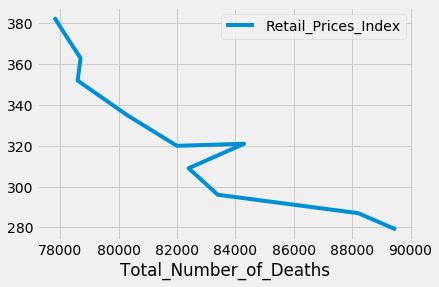

In [69]:
# Convert the Pyspark contructed dataframe to Pandas dataframe to visualize
DFP = df3.toPandas()

# When the Retail Prices Index decrease, the number of deaths caused by smoking tend to increase.
plt.style.use('fivethirtyeight')
DFP.plot(x="Total_Number_of_Deaths" ,y='Retail_Prices_Index')

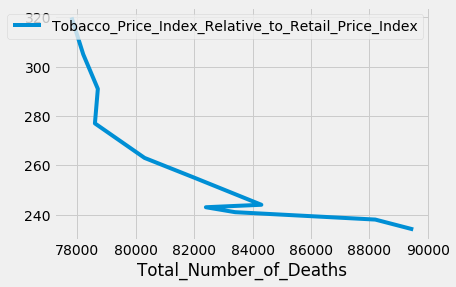

In [70]:
# When the Tobacco Price Index Relative to Retail Price Index decrease, 
# the number of deaths caused by smoking tend to increase.
plt.style.use('fivethirtyeight')
DFP.plot(x="Total_Number_of_Deaths" ,y='Tobacco_Price_Index_Relative_to_Retail_Price_Index')

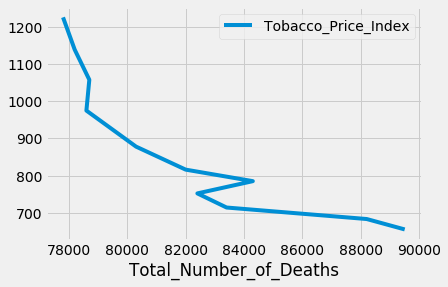

In [71]:
# When the Tobacco Price Index decrease, 
# the number of deaths caused by smoking tend to increase.
plt.style.use('fivethirtyeight')
DFP.plot(x="Total_Number_of_Deaths" ,y='Tobacco_Price_Index')

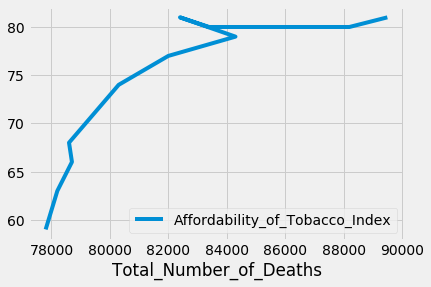

In [72]:
# When the Tobacco Price Index decrease, 
# the number of deaths caused by smoking tend to increase.
plt.style.use('fivethirtyeight')
DFP.plot(x="Total_Number_of_Deaths" ,y='Affordability_of_Tobacco_Index')

In [73]:
# Linear Regression

In [74]:
# Import LinearRegression from pyspark.ml.regression
from pyspark.ml.regression import LinearRegression

In [75]:
# Let's explore. Here's the first row of the data.
print(df3.head())

# And the entire data structure. 
df3.printSchema()

Row(Year=2014, Total_Number_of_Deaths=77800, Tobacco_Price_Index=1226, Retail_Prices_Index=383, Tobacco_Price_Index_Relative_to_Retail_Price_Index=320, Real_Households_Disposable_Income=190, Affordability_of_Tobacco_Index=59, Household_Expenditure_on_Tobacco=19411, Household_Expenditure_Total=1118992)
root
 |-- Year: integer (nullable = true)
 |-- Total_Number_of_Deaths: integer (nullable = true)
 |-- Tobacco_Price_Index: integer (nullable = true)
 |-- Retail_Prices_Index: integer (nullable = true)
 |-- Tobacco_Price_Index_Relative_to_Retail_Price_Index: integer (nullable = true)
 |-- Real_Households_Disposable_Income: integer (nullable = true)
 |-- Affordability_of_Tobacco_Index: integer (nullable = true)
 |-- Household_Expenditure_on_Tobacco: integer (nullable = true)
 |-- Household_Expenditure_Total: integer (nullable = true)



In [76]:
# Let's use a Python package to neatly describe the data.
df3.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Year,11,2009.0,3.3166247903554,2004,2014
Total_Number_of_Deaths,11,82127.27272727272,3991.7642488230463,77800,89500
Tobacco_Price_Index,11,880.0909090909091,193.39206526921137,655,1226
Retail_Prices_Index,11,329.0,35.4400902933387,279,383
Tobacco_Price_Index_Relative_to_Retail_Price_Index,11,264.6363636363636,29.56103085913184,234,320
Real_Households_Disposable_Income,11,192.1818181818182,2.6388702816994187,189,196
Affordability_of_Tobacco_Index,11,73.45454545454545,8.041935542686678,59,81
Household_Expenditure_on_Tobacco,11,16932.727272727272,1551.3208624207361,15300,19411
Household_Expenditure_Total,11,940244.8181818182,107331.59488223231,772164,1118992


In [77]:
# Import VectorAssembler and Vectors
from pyspark.ml.feature import VectorAssembler

# The input columns are the feature column names, and the output column is what you'd like the new column to be named. 
vector_assembler = VectorAssembler(inputCols = ['Year', 'Tobacco_Price_Index', 'Retail_Prices_Index', 'Tobacco_Price_Index_Relative_to_Retail_Price_Index', 'Real_Households_Disposable_Income', 'Affordability_of_Tobacco_Index', 'Household_Expenditure_on_Tobacco', 'Household_Expenditure_Total'], outputCol = 'features')

# Now that we've created the assembler variable, let's actually transform the data.
vector_output = vector_assembler.transform(df3)

# Using print schema, you see that the features output column has been added. 
vector_output.printSchema()

# You can see that the features column is a DenseVector that combines the various features as expected.
vector_output.head(1)

root
 |-- Year: integer (nullable = true)
 |-- Total_Number_of_Deaths: integer (nullable = true)
 |-- Tobacco_Price_Index: integer (nullable = true)
 |-- Retail_Prices_Index: integer (nullable = true)
 |-- Tobacco_Price_Index_Relative_to_Retail_Price_Index: integer (nullable = true)
 |-- Real_Households_Disposable_Income: integer (nullable = true)
 |-- Affordability_of_Tobacco_Index: integer (nullable = true)
 |-- Household_Expenditure_on_Tobacco: integer (nullable = true)
 |-- Household_Expenditure_Total: integer (nullable = true)
 |-- features: vector (nullable = true)



[Row(Year=2014, Total_Number_of_Deaths=77800, Tobacco_Price_Index=1226, Retail_Prices_Index=383, Tobacco_Price_Index_Relative_to_Retail_Price_Index=320, Real_Households_Disposable_Income=190, Affordability_of_Tobacco_Index=59, Household_Expenditure_on_Tobacco=19411, Household_Expenditure_Total=1118992, features=DenseVector([2014.0, 1226.0, 383.0, 320.0, 190.0, 59.0, 19411.0, 1118992.0]))]

In [78]:
# Because the features have been combined into one vector, we no longer need them. Below we select the features and label.
vector_output = vector_output.select(['features', 'Total_Number_of_Deaths'])

# You can see that the dataframe now only contains two columns. 
print(vector_output.head(1))
vector_output.show(3)

[Row(features=DenseVector([2014.0, 1226.0, 383.0, 320.0, 190.0, 59.0, 19411.0, 1118992.0]), Total_Number_of_Deaths=77800)]
+--------------------+----------------------+
|            features|Total_Number_of_Deaths|
+--------------------+----------------------+
|[2014.0,1226.0,38...|                 77800|
|[2013.0,1139.0,37...|                 78200|
|[2012.0,1058.0,36...|                 78700|
+--------------------+----------------------+
only showing top 3 rows



In [128]:
# Importing the LR package.
from pyspark.ml.regression import LinearRegression

# Instantiate the instance.
lr = LinearRegression(featuresCol='features', labelCol='Total_Number_of_Deaths', maxIter=100, regParam=0.0, elasticNetParam=0.0,
                      tol=1e-6, fitIntercept=True, standardization=True, solver="auto", aggregationDepth=2)
# Fit the vector_output
lr_model = lr.fit(vector_output)
# Print the coefficients.
print("Coefficients: " + str(lr_model.coefficients))
# Print the intercept.
print("Intercept: " + str(lr_model.intercept) + "\n")
# Summarise the model and print out some evaluation metrics.
vdf3_Summary = lr_model.summary
# Print MAE (Mean Absolute Error)
print("MAE: " + str(vdf3_Summary.meanAbsoluteError))
# Print RMSE (Root Mean Squared Error) 
print("RMSE: " + str(vdf3_Summary.rootMeanSquaredError))
# Print R2 (R Squarred)
print("R2: " + str(vdf3_Summary.r2))

Coefficients: [-1371.296517789753,283.35148265658574,-270.1319390549323,-1377.9696113569782,755.3935208760568,-1994.7391015577753,-5.838680186663696,-0.09848000653957947]
Intercept: 3234031.036900804

MAE: 477.974000739865
RMSE: 590.1648849609776
R2: 0.9759558378988786


In [80]:
vector_output.describe().show()

# RMSE measures the differences between predicted values and actual values. 
# However, RMSE alone is meaningless until we compare with the actual "Total_Number_of_Deaths" value, such as mean, min and max. 
# After such comparison, our RMSE is not looking good. RMSE should be a low value.

# R squared (R2) at 0.97 indicates that our model can explain approximately 97% of the variability in total number of deaths value

+-------+----------------------+
|summary|Total_Number_of_Deaths|
+-------+----------------------+
|  count|                    11|
|   mean|     82127.27272727272|
| stddev|    3991.7642488230463|
|    min|                 77800|
|    max|                 89500|
+-------+----------------------+



In [117]:
# Linear Regression model performance on the real data frame

lr_predictions = lr_model.transform(vector_output)
lr_predictions.select("prediction","Total_Number_of_Deaths","features").show(5)
from pyspark.ml.evaluation import RegressionEvaluator

lrR2_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="Total_Number_of_Deaths",metricName="r2")
print("R Squared (R2) = %g" % lrR2_evaluator.evaluate(lr_predictions))

lrMAE_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="Total_Number_of_Deaths",metricName="mae")
print("Mean Absolute Error (MAE) = %g" % lrMAE_evaluator.evaluate(lr_predictions))

lrRMSE_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="Total_Number_of_Deaths",metricName="rmse")
print("Root Mean Squared Error (RMSE) = %g" % lrRMSE_evaluator.evaluate(lr_predictions))

+-----------------+----------------------+--------------------+
|       prediction|Total_Number_of_Deaths|            features|
+-----------------+----------------------+--------------------+
|69777.67260687985|                 77800|[2014.0,1226.0,38...|
| 75396.9748627264|                 78200|[2013.0,1139.0,37...|
|78699.99749036413|                 78700|[2012.0,1058.0,36...|
|78599.99779228214|                 78600|[2011.0,975.0,352...|
|80300.02371575311|                 80300|[2010.0,878.0,335...|
+-----------------+----------------------+--------------------+
only showing top 5 rows

R Squared (R2) = 0.441488
Mean Absolute Error (MAE) = 1510.59
Root Mean Squared Error (RMSE) = 2844.36


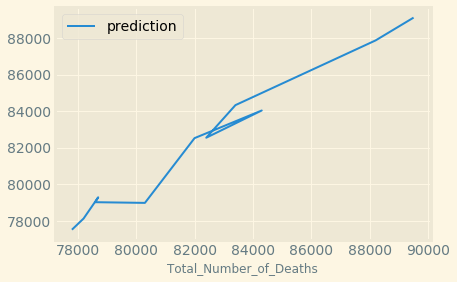

In [82]:
# Convert the Pyspark contructed dataframe to Pandas dataframe to visualize
lr_predictionsPandas = lr_predictions.toPandas()

# When the total_number_of_deaths increase, the prediction tends to increase
plt.style.use('Solarize_Light2')
lr_predictionsPandas.plot(x="Total_Number_of_Deaths" ,y='prediction')

In [83]:
# Following is the statistics comparison of the Total Number of Deaths and Prediction
lr_predictions.describe().show()

+-------+----------------------+------------------+
|summary|Total_Number_of_Deaths|        prediction|
+-------+----------------------+------------------+
|  count|                    11|                11|
|   mean|     82127.27272727272| 82127.27272727223|
| stddev|    3991.7642488230463|3943.4829481454326|
|    min|                 77800| 77520.16091041965|
|    max|                 89500| 89119.42091615638|
+-------+----------------------+------------------+



In [84]:
lr_predictions.show()

+--------------------+----------------------+-----------------+
|            features|Total_Number_of_Deaths|       prediction|
+--------------------+----------------------+-----------------+
|[2014.0,1226.0,38...|                 77800|77520.16091041965|
|[2013.0,1139.0,37...|                 78200|78131.06640867004|
|[2012.0,1058.0,36...|                 78700|79291.28078024974|
|[2011.0,975.0,352...|                 78600|79024.54198215762|
|[2010.0,878.0,335...|                 80300|78986.46359114908|
|[2009.0,816.0,320...|                 82000|82528.94807957765|
|[2008.0,785.0,321...|                 84300| 84040.2200081828|
|[2007.0,752.0,309...|                 82400|82550.36765372148|
|[2006.0,714.0,296...|                 83400|84333.71850835998|
|[2005.0,683.0,287...|                 88200|   87873.81116135|
|[2004.0,655.0,279...|                 89500|89119.42091615638|
+--------------------+----------------------+-----------------+



In [85]:
# Lets merge the lr_predictions with df3 dataframe to extract more meaningful information by visualizing
df4 = df3.join(lr_predictions, lr_predictions.Total_Number_of_Deaths == df3.Total_Number_of_Deaths)

# Order by Year
df5 = df4.orderBy('Year')

# Visualize the output using Pandas
pd.DataFrame(df5.take(11), columns=df5.columns)

,Year,Total_Number_of_Deaths,Tobacco_Price_Index,Retail_Prices_Index,Tobacco_Price_Index_Relative_to_Retail_Price_Index,Real_Households_Disposable_Income,Affordability_of_Tobacco_Index,Household_Expenditure_on_Tobacco,Household_Expenditure_Total,features,Total_Number_of_Deaths,prediction
0,2004,89500,655,279,234,189,81,15375,772164,"[2004.0, 655.0, 279.0, 234.0, 189.0, 81.0, 153...",89500,89119.420916
1,2005,88200,683,287,238,191,80,15300,813580,"[2005.0, 683.0, 287.0, 238.0, 191.0, 80.0, 153...",88200,87873.811161
2,2006,83400,714,296,241,192,80,15542,851456,"[2006.0, 714.0, 296.0, 241.0, 192.0, 80.0, 155...",83400,84333.718508
3,2007,82400,752,309,243,196,81,15766,898478,"[2007.0, 752.0, 309.0, 243.0, 196.0, 81.0, 157...",82400,82550.367654
4,2008,84300,785,321,244,193,79,15879,928265,"[2008.0, 785.0, 321.0, 244.0, 193.0, 79.0, 158...",84300,84040.220008
5,2009,82000,816,320,255,196,77,16209,911665,"[2009.0, 816.0, 320.0, 255.0, 196.0, 77.0, 162...",82000,82528.948080
6,2010,80300,878,335,263,195,74,17176,954781,"[2010.0, 878.0, 335.0, 263.0, 195.0, 74.0, 171...",80300,78986.463591
7,2011,78600,975,352,277,189,68,18217,990828,"[2011.0, 975.0, 352.0, 277.0, 189.0, 68.0, 182...",78600,79024.541982
8,2012,78700,1058,363,291,193,66,18702,1029378,"[2012.0, 1058.0, 363.0, 291.0, 193.0, 66.0, 18...",78700,79291.280780
9,2013,78200,1139,374,305,190,63,18683,1073106,"[2013.0, 1139.0, 374.0, 305.0, 190.0, 63.0, 18...",78200,78131.066409


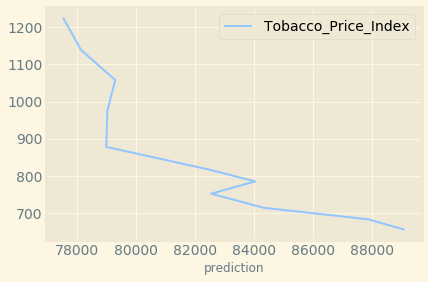

In [86]:
# Convert the Pyspark contructed dataframe to Pandas dataframe to visualize
df5Pandas = df5.toPandas()

# when the Tobacco Price Index is high, the predicted scores are low. 
# But as the Tobacco Price Index decrease, the predicted scores Increase.
plt.style.use('seaborn-pastel')
df5Pandas.plot(x="prediction" ,y='Tobacco_Price_Index')

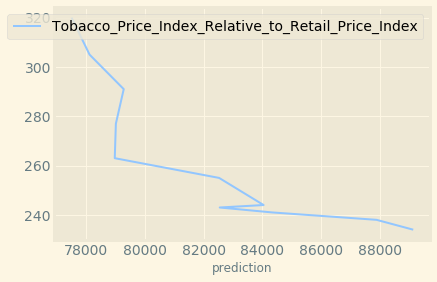

In [87]:
# when the ‘Tobacco Price Index Relative to Retail Price Index’ is high, the predicted values are low. 
# But as the ‘Tobacco Price Index Relative to Retail Price Index’ decrease, the predicted values Increase.
plt.style.use('seaborn-pastel')
df5Pandas.plot(x="prediction" ,y='Tobacco_Price_Index_Relative_to_Retail_Price_Index')

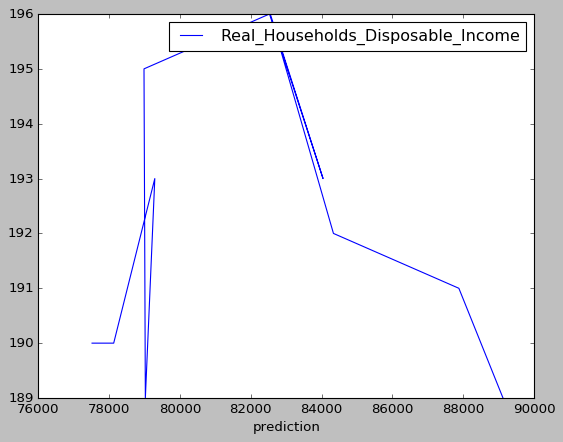

In [88]:
# Real_Households_Disposable_Income vs prediction plot is very disoriented
plt.style.use('classic')
df5Pandas.plot(x="prediction" ,y='Real_Households_Disposable_Income')

In [89]:
lr_predictions.show()

+--------------------+----------------------+-----------------+
|            features|Total_Number_of_Deaths|       prediction|
+--------------------+----------------------+-----------------+
|[2014.0,1226.0,38...|                 77800|77520.16091041965|
|[2013.0,1139.0,37...|                 78200|78131.06640867004|
|[2012.0,1058.0,36...|                 78700|79291.28078024974|
|[2011.0,975.0,352...|                 78600|79024.54198215762|
|[2010.0,878.0,335...|                 80300|78986.46359114908|
|[2009.0,816.0,320...|                 82000|82528.94807957765|
|[2008.0,785.0,321...|                 84300| 84040.2200081828|
|[2007.0,752.0,309...|                 82400|82550.36765372148|
|[2006.0,714.0,296...|                 83400|84333.71850835998|
|[2005.0,683.0,287...|                 88200|   87873.81116135|
|[2004.0,655.0,279...|                 89500|89119.42091615638|
+--------------------+----------------------+-----------------+



In [124]:
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import eli5
from eli5.sklearn import PermutationImportance


xx = df5Pandas[['Year','Tobacco_Price_Index','Retail_Prices_Index','Tobacco_Price_Index_Relative_to_Retail_Price_Index',
                'Real_Households_Disposable_Income','Affordability_of_Tobacco_Index','Household_Expenditure_on_Tobacco',
                'Household_Expenditure_Total']].values
yy = df5Pandas[['Total_Number_of_Deaths']].values
reg = linear_model.LinearRegression()
model=reg.fit(xx,yy)
print('Coefficients: \n', reg.coef_)
perm = PermutationImportance(reg, random_state=1).fit(xx, yy)
eli5.show_weights(perm)

Coefficients: 
 [[-1.37129659e+03  2.83351480e+02 -2.70131928e+02 -1.37796960e+03
   7.55393531e+02 -1.99473912e+03 -5.83868023e+00 -9.84800065e-02]
 [-1.37129659e+03  2.83351480e+02 -2.70131928e+02 -1.37796960e+03
   7.55393531e+02 -1.99473912e+03 -5.83868023e+00 -9.84800065e-02]]


Weight,Feature
271.3945 ± 186.9548,x1
166.0785 ± 82.3473,x3
36.8626 ± 16.2881,x5
12.0777 ± 8.6484,x7
11.0886 ± 6.9454,x6
10.4656 ± 3.6099,x2
2.6574 ± 1.6033,x0
0.4676 ± 0.2009,x4


In [91]:
################################################################################################

In [92]:
# Linear Regression by Splitting Data 

In [93]:
# Now lets do Linear Regression again by splitting the dataset by 60:40 
splits = vector_output.randomSplit([0.6, 0.4])
train_df = splits[0]
test_df = splits[1]

# Let's see our training data.
train_df.describe().show()

# And our testing data.
test_df.describe().show()

+-------+----------------------+
|summary|Total_Number_of_Deaths|
+-------+----------------------+
|  count|                     7|
|   mean|               82400.0|
| stddev|    3823.6108588610323|
|    min|                 78600|
|    max|                 89500|
+-------+----------------------+

+-------+----------------------+
|summary|Total_Number_of_Deaths|
+-------+----------------------+
|  count|                     4|
|   mean|               81650.0|
| stddev|    4837.0100957788645|
|    min|                 77800|
|    max|                 88200|
+-------+----------------------+



In [130]:
# Linear Regression on train_df
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol='features', labelCol='Total_Number_of_Deaths', maxIter=100, regParam=0.0, elasticNetParam=0.0,
                      tol=1e-6, fitIntercept=True, standardization=True, solver="auto", aggregationDepth=2)
lr_model = lr.fit(train_df)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [-3091.583421431972,110.39847716892548,592.0185699024306,-278.7627095745454,228.25887279902005,1136.3243834031994,-0.9169605881501827,-0.1757893037490829]
Intercept: 6127432.727257766


In [131]:
lr_predictions = lr_model.transform(test_df)
lr_predictions.select("prediction","Total_Number_of_Deaths","features").show(5)

from pyspark.ml.evaluation import RegressionEvaluator

lrR2_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="Total_Number_of_Deaths",metricName="r2")
print("R Squared (R2) = %g" % lrR2_evaluator.evaluate(lr_predictions))

lrMAE_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="Total_Number_of_Deaths",metricName="mae")
print("Mean Absolute Error (MAE) = %g" % lrMAE_evaluator.evaluate(lr_predictions))

lrRMSE_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="Total_Number_of_Deaths",metricName="rmse")
print("Root Mean Squared Error (RMSE) = %g" % lrRMSE_evaluator.evaluate(lr_predictions))

+-----------------+----------------------+--------------------+
|       prediction|Total_Number_of_Deaths|            features|
+-----------------+----------------------+--------------------+
| 85229.1685102852|                 88200|[2005.0,683.0,287...|
|85220.24638568982|                 82400|[2007.0,752.0,309...|
| 75396.9748627264|                 78200|[2013.0,1139.0,37...|
|69777.67260687985|                 77800|[2014.0,1226.0,38...|
+-----------------+----------------------+--------------------+

R Squared (R2) = -0.267906
Mean Absolute Error (MAE) = 4154.11
Root Mean Squared Error (RMSE) = 4716.84


In [96]:
# Using our Linear Regression model to make some predictions:

predictions = lr_model.transform(test_df)
predictions.select("prediction","Total_Number_of_Deaths","features").show()

+-----------------+----------------------+--------------------+
|       prediction|Total_Number_of_Deaths|            features|
+-----------------+----------------------+--------------------+
| 85229.1685102852|                 88200|[2005.0,683.0,287...|
|85220.24638568982|                 82400|[2007.0,752.0,309...|
| 75396.9748627264|                 78200|[2013.0,1139.0,37...|
|69777.67260687985|                 77800|[2014.0,1226.0,38...|
+-----------------+----------------------+--------------------+



In [97]:
################################################################################################

In [138]:
# Decision Tree Regression

from pyspark.ml.regression import DecisionTreeRegressor
dt = DecisionTreeRegressor(featuresCol ='features', labelCol = 'Total_Number_of_Deaths', maxDepth=1, maxBins=32, 
                           minInstancesPerNode=3, minInfoGain=0.0, maxMemoryInMB=256, cacheNodeIds=False, 
                           checkpointInterval=10, impurity="variance", seed=None)
dt_model = dt.fit(vector_output)
dt_predictions = dt_model.transform(vector_output)

# RMSE
dtr_evaluator = RegressionEvaluator(
    labelCol="Total_Number_of_Deaths", predictionCol="prediction", metricName="rmse")
rmse = dtr_evaluator.evaluate(dt_predictions)
print("Root Mean Squared Error (RMSE) on vector_output = %g" % rmse)

# MAE
dtm_evaluator = RegressionEvaluator(
    labelCol="Total_Number_of_Deaths", predictionCol="prediction", metricName="mae")
mae = dtm_evaluator.evaluate(dt_predictions)
print("Mean Absolute Error (MAE) on vector_output = %g" % mae)

# R2
dtr2_evaluator = RegressionEvaluator(
    labelCol="Total_Number_of_Deaths", predictionCol="prediction", metricName="r2")
r2 = dtr2_evaluator.evaluate(dt_predictions)
print("R-Squared (R2) on vector_output = %g" % r2)

Root Mean Squared Error (RMSE) on vector_output = 2160.08
Mean Absolute Error (MAE) on vector_output = 1881.21
R-Squared (R2) on vector_output = 0.677892


In [139]:
# Feature Importance
dt_model.featureImportances

SparseVector(8, {0: 1.0})

In [140]:
df3.take(1)

[Row(Year=2014, Total_Number_of_Deaths=77800, Tobacco_Price_Index=1226, Retail_Prices_Index=383, Tobacco_Price_Index_Relative_to_Retail_Price_Index=320, Real_Households_Disposable_Income=190, Affordability_of_Tobacco_Index=59, Household_Expenditure_on_Tobacco=19411, Household_Expenditure_Total=1118992)]

In [101]:
# Decision tree regression using train and test models

from pyspark.ml.regression import DecisionTreeRegressor
dt = DecisionTreeRegressor(featuresCol ='features', labelCol = 'Total_Number_of_Deaths', maxDepth=1, maxBins=32, 
                           minInstancesPerNode=3, minInfoGain=0.0, maxMemoryInMB=256, cacheNodeIds=False, 
                           checkpointInterval=10, impurity="variance", seed=None)
dt_model = dt.fit(train_df)
dt_predictions = dt_model.transform(test_df)
dt_evaluator = RegressionEvaluator(labelCol="Total_Number_of_Deaths", predictionCol="prediction", metricName="rmse")
rmse = dt_evaluator.evaluate(dt_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Root Mean Squared Error (RMSE) on test data = 2474.65


In [102]:
#Feature Importance
dt_model.featureImportances

SparseVector(8, {0: 1.0})

In [103]:
# Because 4: 0.0277 (as per above results), 4th column, Retail_Prices_Index is the most important feature to predict the 
# total number of deaths in our data
df3.take(1)

[Row(Year=2014, Total_Number_of_Deaths=77800, Tobacco_Price_Index=1226, Retail_Prices_Index=383, Tobacco_Price_Index_Relative_to_Retail_Price_Index=320, Real_Households_Disposable_Income=190, Affordability_of_Tobacco_Index=59, Household_Expenditure_on_Tobacco=19411, Household_Expenditure_Total=1118992)]

In [104]:
################################################################################################

In [144]:
# Gradient-boosted Tree Regression

from pyspark.ml.regression import GBTRegressor
gbt = GBTRegressor(featuresCol = 'features', labelCol = 'Total_Number_of_Deaths', maxDepth=4, maxBins=32, 
                   minInstancesPerNode=1, minInfoGain=0.0,maxMemoryInMB=256, cacheNodeIds=False, checkpointInterval=10,seed=None)
gbt_model = gbt.fit(vector_output)
gbt_predictions = gbt_model.transform(vector_output)
gbt_predictions.select('prediction', 'Total_Number_of_Deaths', 'features').show(11)

+-----------------+----------------------+--------------------+
|       prediction|Total_Number_of_Deaths|            features|
+-----------------+----------------------+--------------------+
|77802.88230376152|                 77800|[2014.0,1226.0,38...|
|78197.11769623848|                 78200|[2013.0,1139.0,37...|
|78699.27942405963|                 78700|[2012.0,1058.0,36...|
|78600.72057594037|                 78600|[2011.0,975.0,352...|
|          80300.0|                 80300|[2010.0,878.0,335...|
|          82000.0|                 82000|[2009.0,816.0,320...|
|          84300.0|                 84300|[2008.0,785.0,321...|
|          82400.0|                 82400|[2007.0,752.0,309...|
|          83400.0|                 83400|[2006.0,714.0,296...|
|          88200.0|                 88200|[2005.0,683.0,287...|
|          89500.0|                 89500|[2004.0,655.0,279...|
+-----------------+----------------------+--------------------+



In [145]:
# Gradient-boosted tree model evaluation

# Root Mean Squared Error (RMSE)
gbt_evaluator_RMSE = RegressionEvaluator(
    labelCol="Total_Number_of_Deaths", predictionCol="prediction", metricName="rmse")
grmse = gbt_evaluator_RMSE.evaluate(gbt_predictions)
print("Root Mean Squared Error (RMSE) on vector_output = %g" % grmse)

# Mean Absolute Error (MAE)
gbt_evaluator_MAE = RegressionEvaluator(
    labelCol="Total_Number_of_Deaths", predictionCol="prediction", metricName="mae")
gmae = gbt_evaluator_MAE.evaluate(gbt_predictions)
print("Mean Absolute Error (MAE) on vector_output = %g" % gmae)

# R Squarred (R2)
gbt_evaluator_R2 = RegressionEvaluator(
    labelCol="Total_Number_of_Deaths", predictionCol="prediction", metricName="r2")
gr2 = gbt_evaluator_R2.evaluate(gbt_predictions)
print("R Squarred (R2) on vector_output = %g" % gr2)

Root Mean Squared Error (RMSE) on vector_output = 1.26684
Mean Absolute Error (MAE) on vector_output = 0.655069
R Squarred (R2) on vector_output = 1


In [147]:
# Feature Importance of Gradient-boosted tree regression
gbt_model.featureImportances

SparseVector(8, {0: 0.5968, 4: 0.0009, 5: 0.3765, 6: 0.0259})

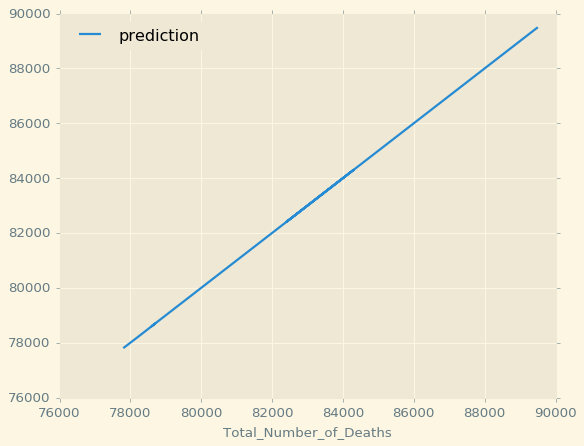

In [148]:
# Convert the Pyspark contructed dataframe to Pandas dataframe to visualize
gbt_predictionsPandas = gbt_predictions.toPandas()

# When the total_number_of_deaths increase, the prediction tends to increase
plt.style.use('Solarize_Light2')
gbt_predictionsPandas.plot(x="Total_Number_of_Deaths" ,y='prediction')

In [149]:
# Following is the statistics comparison of the Total Number of Deaths and Prediction
gbt_predictions.describe().show()

+-------+----------------------+-----------------+
|summary|Total_Number_of_Deaths|       prediction|
+-------+----------------------+-----------------+
|  count|                    11|               11|
|   mean|     82127.27272727272|82127.27272727272|
| stddev|    3991.7642488230463|3991.733782173233|
|    min|                 77800|77802.88230376152|
|    max|                 89500|          89500.0|
+-------+----------------------+-----------------+



In [150]:
# Lets merge the gbt_predictions with df3 dataframe to extract more meaningful information by visualizing
df6 = df3.join(gbt_predictions, gbt_predictions.Total_Number_of_Deaths == df3.Total_Number_of_Deaths)

# Order by Year
df7 = df6.orderBy('Year')

# Visualize the output using Pandas
pd.DataFrame(df7.take(11), columns=df7.columns)

,Year,Total_Number_of_Deaths,Tobacco_Price_Index,Retail_Prices_Index,Tobacco_Price_Index_Relative_to_Retail_Price_Index,Real_Households_Disposable_Income,Affordability_of_Tobacco_Index,Household_Expenditure_on_Tobacco,Household_Expenditure_Total,features,Total_Number_of_Deaths,prediction
0,2004,89500,655,279,234,189,81,15375,772164,"[2004.0, 655.0, 279.0, 234.0, 189.0, 81.0, 153...",89500,89500.000000
1,2005,88200,683,287,238,191,80,15300,813580,"[2005.0, 683.0, 287.0, 238.0, 191.0, 80.0, 153...",88200,88200.000000
2,2006,83400,714,296,241,192,80,15542,851456,"[2006.0, 714.0, 296.0, 241.0, 192.0, 80.0, 155...",83400,83400.000000
3,2007,82400,752,309,243,196,81,15766,898478,"[2007.0, 752.0, 309.0, 243.0, 196.0, 81.0, 157...",82400,82400.000000
4,2008,84300,785,321,244,193,79,15879,928265,"[2008.0, 785.0, 321.0, 244.0, 193.0, 79.0, 158...",84300,84300.000000
5,2009,82000,816,320,255,196,77,16209,911665,"[2009.0, 816.0, 320.0, 255.0, 196.0, 77.0, 162...",82000,82000.000000
6,2010,80300,878,335,263,195,74,17176,954781,"[2010.0, 878.0, 335.0, 263.0, 195.0, 74.0, 171...",80300,80300.000000
7,2011,78600,975,352,277,189,68,18217,990828,"[2011.0, 975.0, 352.0, 277.0, 189.0, 68.0, 182...",78600,78600.720576
8,2012,78700,1058,363,291,193,66,18702,1029378,"[2012.0, 1058.0, 363.0, 291.0, 193.0, 66.0, 18...",78700,78699.279424
9,2013,78200,1139,374,305,190,63,18683,1073106,"[2013.0, 1139.0, 374.0, 305.0, 190.0, 63.0, 18...",78200,78197.117696


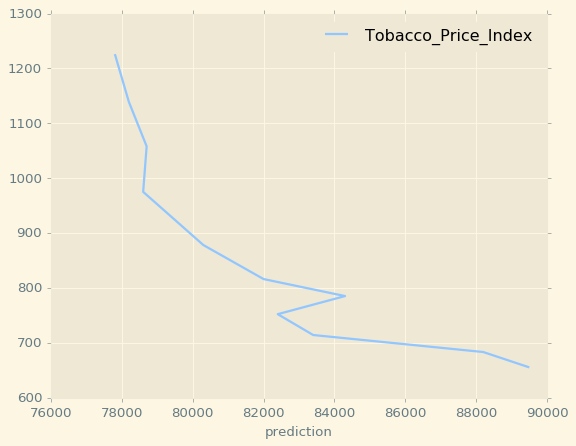

In [151]:
# Convert the Pyspark contructed dataframe to Pandas dataframe to visualize
df7Pandas = df7.toPandas()

# when the Tobacco Price Index is high, the predicted scores are low. 
# But as the Tobacco Price Index decrease, the predicted scores Increase.
plt.style.use('seaborn-pastel')
df7Pandas.plot(x="prediction" ,y='Tobacco_Price_Index')

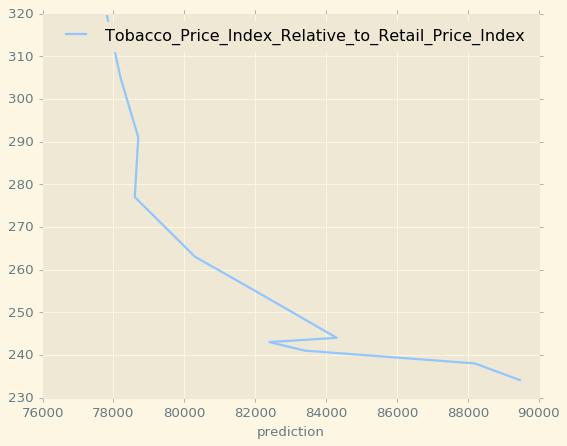

In [152]:
# when the ‘Tobacco Price Index Relative to Retail Price Index’ is high, the predicted values are low. 
# But as the ‘Tobacco Price Index Relative to Retail Price Index’ decrease, the predicted values Increase.
plt.style.use('seaborn-pastel')
df7Pandas.plot(x="prediction" ,y='Tobacco_Price_Index_Relative_to_Retail_Price_Index')

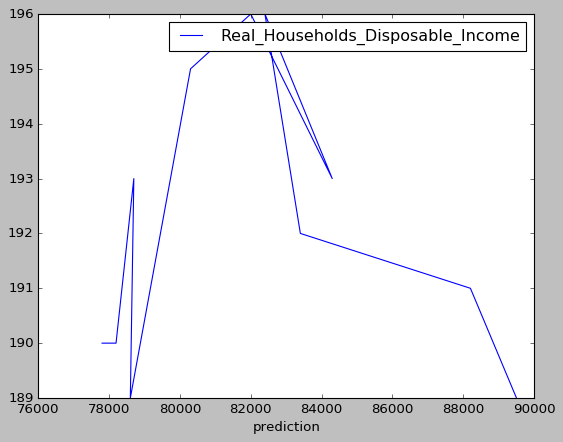

In [153]:
# Real_Households_Disposable_Income vs prediction plot is very disoriented
plt.style.use('classic')
df7Pandas.plot(x="prediction" ,y='Real_Households_Disposable_Income')

In [154]:
################################################################################################

In [155]:
# Gradient-boosted Tree Regression on train and test data (split data)

from pyspark.ml.regression import GBTRegressor
gbt = GBTRegressor(featuresCol = 'features', labelCol = 'Total_Number_of_Deaths', maxDepth=5, maxBins=32, 
                   minInstancesPerNode=1, minInfoGain=0.0,maxMemoryInMB=256, cacheNodeIds=False, checkpointInterval=10,seed=None)
gbt_model = gbt.fit(train_df)
gbt_predictions = gbt_model.transform(test_df)
gbt_predictions.select('prediction', 'Total_Number_of_Deaths', 'features').show(11)

+----------+----------------------+--------------------+
|prediction|Total_Number_of_Deaths|            features|
+----------+----------------------+--------------------+
|   83400.0|                 88200|[2005.0,683.0,287...|
|   84300.0|                 82400|[2007.0,752.0,309...|
|   78700.0|                 78200|[2013.0,1139.0,37...|
|   78700.0|                 77800|[2014.0,1226.0,38...|
+----------+----------------------+--------------------+



In [156]:
# Root Mean Squared Error (RMSE)
gbt_evaluator_RMSE = RegressionEvaluator(
    labelCol="Total_Number_of_Deaths", predictionCol="prediction", metricName="rmse")
grmse = gbt_evaluator_RMSE.evaluate(gbt_predictions)
print("Root Mean Squared Error (RMSE) = %g" % grmse)

# Mean Absolute Error (MAE)
gbt_evaluator_MAE = RegressionEvaluator(
    labelCol="Total_Number_of_Deaths", predictionCol="prediction", metricName="mae")
gmae = gbt_evaluator_MAE.evaluate(gbt_predictions)
print("Mean Absolute Error (MAE) = %g" % gmae)

# R Squarred (R2)
gbt_evaluator_R2 = RegressionEvaluator(
    labelCol="Total_Number_of_Deaths", predictionCol="prediction", metricName="r2")
gr2 = gbt_evaluator_R2.evaluate(gbt_predictions)
print("R Squarred (R2) = %g" % gr2)

Root Mean Squared Error (RMSE) = 2632.01
Mean Absolute Error (MAE) = 2025
R Squarred (R2) = 0.605214
